In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [84]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [85]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [86]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [87]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed

Data for SRL updated in data\SRL.csv.
Updating data for SLAMW...


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [88]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [89]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [136]:
from backtest_utils import TradingSimulator
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
TS_no_leverage = TradingSimulator(strategy_name)
test_no_leverage = TS_no_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0, save_test=True)
TS_leverage = TradingSimulator(strategy_name)
test_w_leverage = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0, save_test=True)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 29.60it/s, Profit=-3761.65]


Backtest results saved to backtests/Test_1.pkl
NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|███████████████████████| 73/73 [00:02<00:00, 30.45it/s, Profit=-1.5e+4]


Backtest results saved to backtests/Test_2.pkl


In [137]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [191]:
no_leverage_analyzer = BacktestAnalyzer(test_no_leverage)
leveraged_analyzer = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison, no_leverage_analysis, leveraged_analysis = (
    compare_two_backtests(no_leverage_analyzer, leveraged_analyzer)
)

from IPython.display import display, HTML
display(total_comparison)
display(long_comparison)
display(short_comparison)

backtests/Test_1_analysis.pkl
Backtest analysis saved to backtests/Test_1_analysis.pkl
backtests/Test_2_analysis.pkl
Backtest analysis saved to backtests/Test_2_analysis.pkl
strategy_name               False
symbols                     False
start_date_dt               False
end_date_dt                 False
rebalance_frequency         False
long_count                  False
short_count                 False
portfolio_starting_value    False
risk_pct                    False
reinvest_profits_bool       False
leverage_multiplier          True
Name: 0, dtype: bool
['leverage_multiplier=1.0', 'leverage_multiplier=5.0']


C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:98: RuntimeWarning: invalid value encountered in scalar power
  cagr = (cumulative_returns[-1] / [x for x in cumulative_returns if x != 0][0]) ** (1 / len(cumulative_returns)) - 1
C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:145: RuntimeWarning: invalid value encountered in scalar power
  long_cagr = (long_cumulative_returns[-1] / [x for x in long_cumulative_returns if x != 0][0]) ** (1 / len(long_profits)) - 1
C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:43: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  this_backtest = backtests_table.loc[[(backtests_table['strategy_name'] == self.strategy_name) &
C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:43: FutureWarning: Logical ops (and, o

lst                                           total                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                            NaN                0.043666
max_drawdown                           70106.174367           427629.137626
sharpe_ratio                              -0.275417               -0.293753
sortino_ratio                             -0.474754               -0.631961
profit_to_drawdown_ratio                  -0.966588               -0.915186
beta                                       0.322305                1.530384
alpha                                  -1252.868998            -6902.370074
total_return                          -67763.769928          -391360.007465
positive_returns                       65669.866272           365814.417182
negative_returns                     -133433.636201          -757174.424647
pct_profitable_bets                        0.439269                0.415525
pct_negative_bets                          0.558904                0.583562
median_gain                             2346.796371            11462.475643
average_loss                           -2668.672724           -15143.488493
median_gain_to_average_loss               -0.879387               -0.756924
test_score                                 0.786938                0.288174
pct_positive_returns                            NaN                     NaN
pct_negative_returns                            NaN                     NaN

lst                                            long                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                       0.039483                     NaN
max_drawdown                          270569.425700            38395.408840
sharpe_ratio                              -0.087924               -0.070226
sortino_ratio                             -0.200216               -0.121595
profit_to_drawdown_ratio                  -0.460852               -0.475422
beta                                       1.983569                0.418590
alpha                                  -3705.797762             -671.623692
total_return                         -124692.331272           -18254.024016
positive_returns                                NaN                     NaN
negative_returns                                NaN                     NaN
pct_profitable_bets                        1.000000                1.000000
pct_negative_bets                               NaN                     NaN
median_gain                            12247.106853             1801.493256
average_loss                          -14268.767482            -2374.473041
median_gain_to_average_loss               -0.858316               -0.758692
test_score                                 0.945273                0.054444
pct_positive_returns                    6501.313739             1148.607079
pct_negative_returns                   -8209.427866            -1398.662202

lst                                           short                        
test                        leverage_multiplier=1.0 leverage_multiplier=5.0
cagr                                       0.046150                0.054323
max_drawdown                          259141.058943            48468.353852
sharpe_ratio                              -0.852837               -0.774256
sortino_ratio                             -1.491578               -1.207367
profit_to_drawdown_ratio                  -1.029044               -1.021486
beta                                      -0.453185               -0.096285
alpha                                  -3196.572312             -581.245306
total_return                         -266667.676193           -49509.745912
positive_returns                                NaN                     NaN
negative_returns                                NaN                     NaN
pct_profitable_bets                        1.000000                1.000000
pct_negative_bets                               NaN                     NaN
median_gain                             1952.025681              295.484909
average_loss                           -5263.456154             -990.303337
median_gain_to_average_loss               -0.370864               -0.298378
test_score                                 0.631877                0.461024
pct_positive_returns                     601.044341              108.600652
pct_negative_returns                   -4254.026207             -786.816350

In [192]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

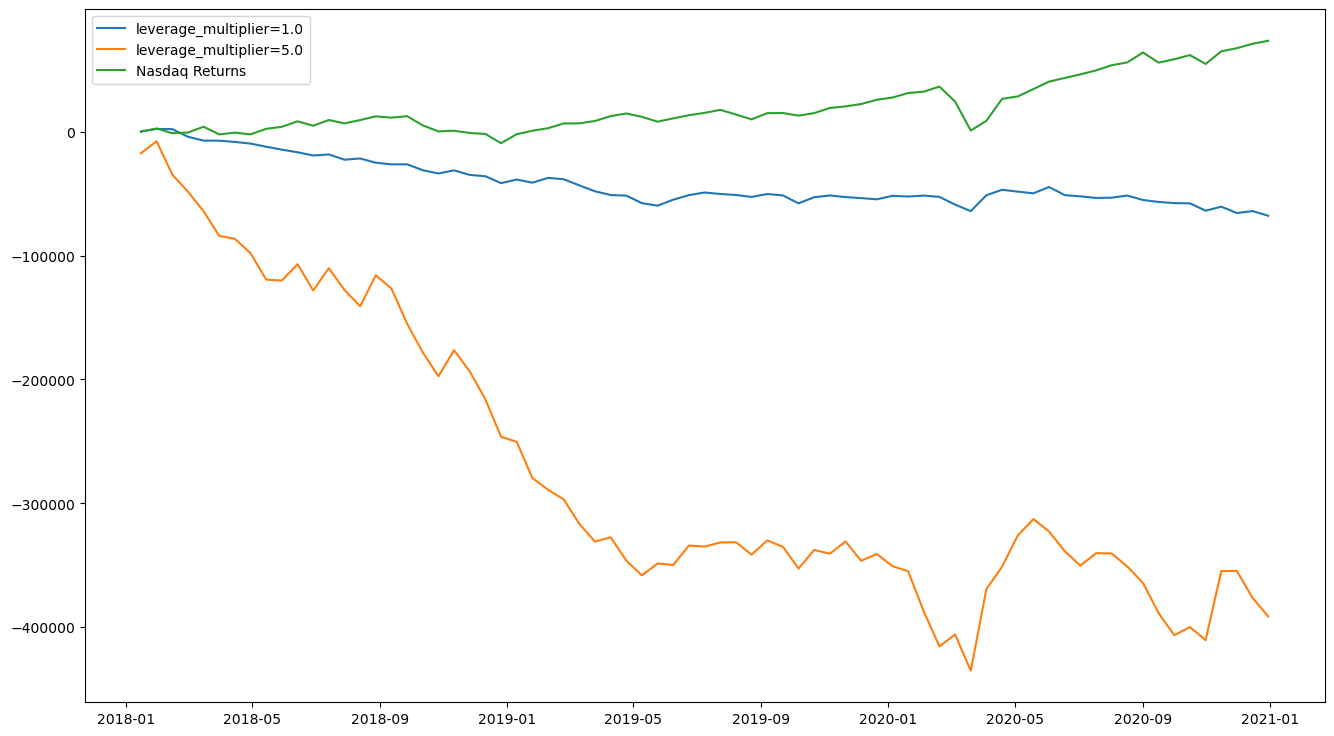

In [197]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage['backtest_profits']), label=total_comparison.columns[0][1])
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage['backtest_profits']), label=total_comparison.columns[1][1])

plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')
# Show labels
plt.legend()
# Show the plot
plt.show()